<a href="https://colab.research.google.com/github/CJL-INVEST/invest/blob/main/VAA_korea_choi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 install 및 import

In [1]:
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 50 kB/s 
     |████████████████████████████████| 62 kB 503 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
!pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
from datetime import datetime, timedelta
import math
import finterstellar as fs
import quantstats as qs
import FinanceDataReader as fdr

In [5]:
start_day = datetime(2016,1,1)

end_day = datetime(2022,5,7)


# 한국ETF로 변화
## 공격자산
 * SPY (미국 S&P)  -> TIGER 미국s&p500선물
 * VEA (선진국지수) -> ARIRANG 선진국MSCI(합성 H)
 * EEM (개도국지수) -> ARIRANG 신흥국MSCI(합성 H)
 * AGG (미국총채권)
 * 3가지만 가지고 진행

## 수비자산
 * LQD (미국회사채) -> ARIRANG 미국단기우량회사채 (332610)
 * SHY (미국단기채)
 * IEF (미국중기채) -> TIGER 미국채10년선물 (305080)

 * 운용기간 짧아 다음으로 대체
 > * KBSTAR 중기우량회사채 (136340)
 > * KODEX 단기채권 (153130)
 > * KOSEF 국고채10년 (148070)
 
## 백테스트 기간
 * 2016년부터

출처: https://lazyquant.tistory.com/entry/VAA-전략-국내-ETF로-운영해본다면 [게으른 퀀트]

In [6]:
# RU: Risky Universe, CU: Cash Universe, BU: Benchmark Universe
RU = ['143850', '195970', '195980'] #TIGER 미국s&p500선물, ARIRANG 선진국MSCI(합성 H), ARIRANG 신흥국MSCI(합성 H)
RU_Name = ['TI_SP500', 'AR_선진국_MSCI', 'AR_신흥국_MSCI']
CU = ['136340', '153130', '148070'] #KBSTAR 중기우량회사채, KODEX 단기채권,KOSEF 국고채10년
CU_Name = ['KB_중기우량회사채', 'KO_단기채권', 'KO_국고채10']
BU = ['^GSPC', '^IXIC', '^KS11', '^KQ11'] # 지수: S&P500, 나스닥, 코스피, 코스닥

In [7]:
SLIPPAGE = 0.015
TRANSACTION_FEE = 0.003

# 데이터 가져오기

In [8]:
df_RCU = pd.DataFrame(columns=(RU + CU))

In [9]:
for ticker in (RU + CU):
    df_RCU[ticker] = fdr.DataReader(ticker, start_day - timedelta(days=365), end_day)['Close']


In [10]:
df_RCU

,143850,195970,195980,136340,153130,148070
Date,,,,,,
2015-01-02,23385,9071,9476,90895,94290,101790
2015-01-05,23255,8962,9407,90890,94294,101717
2015-01-06,22920,8794,9219,90957,94313,102393
2015-01-07,22720,8720,9249,91059,94328,102670
2015-01-08,23150,8724,9422,91041,94342,102231
...,...,...,...,...,...,...
2022-04-29,50215,10680,10200,102535,103370,111220
2022-05-02,48820,10680,10075,102245,103375,110070
2022-05-03,48930,10585,10105,102205,103355,109670


In [11]:
df_RCU

,143850,195970,195980,136340,153130,148070
Date,,,,,,
2015-01-02,23385,9071,9476,90895,94290,101790
2015-01-05,23255,8962,9407,90890,94294,101717
2015-01-06,22920,8794,9219,90957,94313,102393
2015-01-07,22720,8720,9249,91059,94328,102670
2015-01-08,23150,8724,9422,91041,94342,102231
...,...,...,...,...,...,...
2022-04-29,50215,10680,10200,102535,103370,111220
2022-05-02,48820,10680,10075,102245,103375,110070
2022-05-03,48930,10585,10105,102205,103355,109670


In [12]:
df_BU = pd.DataFrame(columns=BU)

In [13]:
for ticker in BU:
    df_BU[ticker] = fs.get_ohlc(ticker, start_day - timedelta(days=365), end_day)['Adj Close']

In [14]:
df_BU

,^GSPC,^IXIC,^KS11,^KQ11
Date,,,,
2015-01-02,"2,058.20","4,726.81","1,926.44",553.73
2015-01-05,"2,020.58","4,652.57","1,915.75",561.25
2015-01-06,"2,002.61","4,592.74","1,882.45",558.90
2015-01-07,"2,025.90","4,650.47","1,883.83",561.32
2015-01-08,"2,062.14","4,736.19","1,904.65",566.43
...,...,...,...,...
2022-05-02,"4,155.38","12,536.02","2,687.45",901.82
2022-05-03,"4,175.48","12,563.76","2,680.46",907.57
2022-05-04,"4,300.17","12,964.86","2,677.57",900.06


In [15]:
# 함수 전체

def get_price_data(RU, CU, BU):
  df_RCU = pd.DataFrame(columns=RU+CU)
  df_BU = pd.DataFrame(columns=BU)

  for ticker in RU + CU:
    # 모멘텀 스코어 계산을 위해 1년전것부터 가져옴
    df_RCU[ticker] = fdr.DataReader(ticker, start_day - timedelta(days=365), end_day)['Close']

  for ticker in BU:
    df_BU[ticker] = fs.get_ohlc(ticker, start_day - timedelta(days=365), end_day)['Adj Close']

  return df_RCU, df_BU

In [16]:
df_RCU, df_BU = get_price_data(RU, CU, BU)

# 모멘텀 계산

In [17]:
mom_col_list = [col+'_M' for col in df_RCU[RU+CU].columns]
mom_col_list

['143850_M', '195970_M', '195980_M', '136340_M', '153130_M', '148070_M']

In [18]:
mom_col_list = [col+'_M' for col in RU+CU]

In [19]:
mom_col_list

['143850_M', '195970_M', '195980_M', '136340_M', '153130_M', '148070_M']

In [20]:
df_RCU.tail()

,143850,195970,195980,136340,153130,148070
Date,,,,,,
2022-04-29,50215,10680,10200,102535,103370,111220
2022-05-02,48820,10680,10075,102245,103375,110070
2022-05-03,48930,10585,10105,102205,103355,109670
2022-05-04,49120,10480,10075,102010,103390,109190
2022-05-06,48670,10355,9795,102085,103380,109520


In [21]:
x = df_RCU.loc['2022-05-06']

In [22]:
x

143850     48670
195970     10355
195980      9795
136340    102085
153130    103380
148070    109520
Name: 2022-05-06 00:00:00, dtype: int64

In [23]:
temp_list = [0 for i in range(len(x.index))]
temp_list

[0, 0, 0, 0, 0, 0]

In [24]:
momentum = pd.Series(temp_list, index=x.index)

In [25]:
momentum

143850    0
195970    0
195980    0
136340    0
153130    0
148070    0
dtype: int64

In [26]:
before1 = df_RCU[x.name-timedelta(days=35):x.name-timedelta(days=30)].iloc[-1][RU+CU]

In [27]:
before1

143850     53180
195970     11415
195980     10905
136340    102455
153130    103290
148070    111990
Name: 2022-04-06 00:00:00, dtype: int64

In [28]:
before3 = df_RCU[x.name-timedelta(days=95):x.name-timedelta(days=90)].iloc[-1][RU+CU]
before6 = df_RCU[x.name-timedelta(days=185):x.name-timedelta(days=180)].iloc[-1][RU+CU]
before12 = df_RCU[x.name-timedelta(days=370):x.name-timedelta(days=365)].iloc[-1][RU+CU] 

In [29]:
x

143850     48670
195970     10355
195980      9795
136340    102085
153130    103380
148070    109520
Name: 2022-05-06 00:00:00, dtype: int64

In [30]:
before1

143850     53180
195970     11415
195980     10905
136340    102455
153130    103290
148070    111990
Name: 2022-04-06 00:00:00, dtype: int64

In [31]:
# 수익률 계산식
x / before1 - 1

143850   -0.08
195970   -0.09
195980   -0.10
136340   -0.00
153130    0.00
148070   -0.02
dtype: float64

In [32]:
momentum = 12 * (x / before1 - 1) + 4 * (x / before3 - 1) + 2 * (x / before6 - 1) + 1 * (x / before12 - 1)

In [33]:
momentum

143850   -1.57
195970   -2.14
195980   -2.48
136340   -0.19
153130    0.03
148070   -0.73
dtype: float64

In [34]:
# 모멘텀 지수 계산 전체 함수

def get_momentum(x):
  temp_list = [0 for i in range(len(x.index))]
  momentum = pd.Series(temp_list, index=x.index)

  try: 
    before1 = df_RCU[x.name-timedelta(days=35):x.name-timedelta(days=30)].iloc[-1][RU+CU]
    before3 = df_RCU[x.name-timedelta(days=95):x.name-timedelta(days=90)].iloc[-1][RU+CU]
    before6 = df_RCU[x.name-timedelta(days=185):x.name-timedelta(days=180)].iloc[-1][RU+CU]
    before12 = df_RCU[x.name-timedelta(days=370):x.name-timedelta(days=365)].iloc[-1][RU+CU]    

    momentum = 12 * (x / before1 - 1) + 4 * (x / before3 - 1) + 2 * (x / before6 - 1) + (x / before12 - 1)
  except Exception as e:
    print('Error: ', str(e))
    pass
  
  return momentum

In [35]:
mom_col_list = [col+'_M' for col in df_RCU[RU+CU].columns]
mom_col_list
x

143850     48670
195970     10355
195980      9795
136340    102085
153130    103380
148070    109520
Name: 2022-05-06 00:00:00, dtype: int64

In [36]:
df_RCU[RU+CU]


,143850,195970,195980,136340,153130,148070
Date,,,,,,
2015-01-02,23385,9071,9476,90895,94290,101790
2015-01-05,23255,8962,9407,90890,94294,101717
2015-01-06,22920,8794,9219,90957,94313,102393
2015-01-07,22720,8720,9249,91059,94328,102670
2015-01-08,23150,8724,9422,91041,94342,102231
...,...,...,...,...,...,...
2022-04-29,50215,10680,10200,102535,103370,111220
2022-05-02,48820,10680,10075,102245,103375,110070
2022-05-03,48930,10585,10105,102205,103355,109670


In [37]:
#@title
df_RCU[mom_col_list] = df_RCU[RU+CU].apply(lambda x: get_momentum(x), axis=1)

Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional indexer is out-of-bounds
Error:  single positional index

In [38]:
df_RCU[mom_col_list]

,143850_M,195970_M,195980_M,136340_M,153130_M,148070_M
Date,,,,,,
2015-01-02,0.00,0.00,0.00,0.00,0.00,0.00
2015-01-05,0.00,0.00,0.00,0.00,0.00,0.00
2015-01-06,0.00,0.00,0.00,0.00,0.00,0.00
2015-01-07,0.00,0.00,0.00,0.00,0.00,0.00
2015-01-08,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
2022-04-29,-1.07,-1.73,-1.76,-0.19,0.03,-0.65
2022-05-02,-1.40,-1.57,-1.84,-0.21,0.03,-0.75
2022-05-03,-1.37,-1.72,-1.79,-0.22,0.03,-0.82


In [39]:
df_RCU_last = df_RCU.resample('M').last()

In [40]:
df_RCU_last

,143850,195970,195980,136340,153130,148070,143850_M,195970_M,195980_M,136340_M,153130_M,148070_M
Date,,,,,,,,,,,,
2015-01-31,22930,9189,9625,91459,94470,105043,0.00,0.00,0.00,0.00,0.00,0.00
2015-02-28,24015,9630,9837,91574,94591,104302,0.00,0.00,0.00,0.00,0.00,0.00
2015-03-31,23740,9639,9674,92406,94842,106272,0.00,0.00,0.00,0.00,0.00,0.00
2015-04-30,23995,9870,10430,92257,94973,104486,0.00,0.00,0.00,0.00,0.00,0.00
2015-05-31,24360,9940,10055,92463,95090,105201,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,50975,11570,11355,103965,103160,116500,-1.12,-1.15,-0.92,-0.11,0.03,-0.50
2022-02-28,50325,11110,11105,104050,103260,116030,-0.40,-0.95,-0.80,-0.04,0.03,-0.31
2022-03-31,54120,11615,10895,103260,103305,113390,1.11,0.24,-0.81,-0.19,0.03,-0.63


In [41]:
df_RCU = df_RCU_last

In [42]:
df_RCU

,143850,195970,195980,136340,153130,148070,143850_M,195970_M,195980_M,136340_M,153130_M,148070_M
Date,,,,,,,,,,,,
2015-01-31,22930,9189,9625,91459,94470,105043,0.00,0.00,0.00,0.00,0.00,0.00
2015-02-28,24015,9630,9837,91574,94591,104302,0.00,0.00,0.00,0.00,0.00,0.00
2015-03-31,23740,9639,9674,92406,94842,106272,0.00,0.00,0.00,0.00,0.00,0.00
2015-04-30,23995,9870,10430,92257,94973,104486,0.00,0.00,0.00,0.00,0.00,0.00
2015-05-31,24360,9940,10055,92463,95090,105201,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,50975,11570,11355,103965,103160,116500,-1.12,-1.15,-0.92,-0.11,0.03,-0.50
2022-02-28,50325,11110,11105,104050,103260,116030,-0.40,-0.95,-0.80,-0.04,0.03,-0.31
2022-03-31,54120,11615,10895,103260,103305,113390,1.11,0.24,-0.81,-0.19,0.03,-0.63


# VAA 전략 기준에 맞춰 자산 선택

In [43]:
x = df_RCU.iloc[-1]

In [44]:
x

143850      48,670.00
195970      10,355.00
195980       9,795.00
136340     102,085.00
153130     103,380.00
148070     109,520.00
143850_M        -1.57
195970_M        -2.14
195980_M        -2.48
136340_M        -0.19
153130_M         0.03
148070_M        -0.73
Name: 2022-05-31 00:00:00, dtype: float64

In [45]:
asset = pd.Series([0,0], index=['ASSET', 'PRICE'])

In [46]:
# 함수 전체

def select_asset(x):
  asset = pd.Series([0,0], index=['ASSET', 'PRICE'])

  # 위험자산의 모멘텀이 전부 0 이상이면 그 중 가장 모멘텀이 큰 걸 선택
  if (x['143850_M'] > 0 and x['195970_M'] > 0 and x['195980_M'] > 0): 
      max_momentum = max(x['143850_M'], x['195970_M'], x['195980_M'])
  # 그렇지 않으면 안전자산 중 가장 모멘텀이 큰 걸 선택
  else:
      max_momentum = max(x['136340_M'], x['153130_M'], x['148070_M'])

  asset['ASSET'] = str(int(x[x == max_momentum].index[0][:-2]))
  asset['PRICE'] = x[str(asset['ASSET'])]

  return asset  

In [47]:
df_RCU[['ASSET', 'PRICE']] = df_RCU.apply(lambda x: select_asset(x), axis=1)

In [48]:
df_RCU.head(5)[['ASSET', 'PRICE']]

,ASSET,PRICE
Date,,
2015-01-31,143850,22930
2015-02-28,143850,24015
2015-03-31,143850,23740
2015-04-30,143850,23995
2015-05-31,143850,24360


In [49]:
df_RCU.tail(15)[['ASSET', 'PRICE']]

,ASSET,PRICE
Date,,
2021-03-31,143850,46065
2021-04-30,143850,48900
2021-05-31,143850,49050
2021-06-30,143850,50045
2021-07-31,148070,122445
2021-08-31,148070,122270
2021-09-30,153130,102935
2021-10-31,143850,53445
2021-11-30,148070,119720


# 수익률 계산

In [50]:
# 지난달 대비 수익률 계산
profit_col_list = [col+'_P' for col in df_RCU[RU+CU].columns]
profit_col_list

['143850_P', '195970_P', '195980_P', '136340_P', '153130_P', '148070_P']

In [51]:
df_RCU[profit_col_list] = df_RCU[RU+CU].pct_change()

In [52]:
df_RCU[profit_col_list]

,143850_P,195970_P,195980_P,136340_P,153130_P,148070_P
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.05,0.05,0.02,0.00,0.00,-0.01
2015-03-31,-0.01,0.00,-0.02,0.01,0.00,0.02
2015-04-30,0.01,0.02,0.08,-0.00,0.00,-0.02
2015-05-31,0.02,0.01,-0.04,0.00,0.00,0.01
...,...,...,...,...,...,...
2022-01-31,-0.09,-0.07,-0.03,-0.01,0.00,-0.03
2022-02-28,-0.01,-0.04,-0.02,0.00,0.00,-0.00
2022-03-31,0.08,0.05,-0.02,-0.01,0.00,-0.02


In [53]:
df_RCU['PROFIT'] = 0
df_RCU['PROFIT_ACC'] = 0
df_RCU['LOG_PROFIT'] = 0
df_RCU['LOG_PROFIT_ACC'] = 0

In [54]:
# 매월 수익률 & 누적 수익률
df_RCU['PROFIT'] = 0
df_RCU['PROFIT_ACC'] = 0
df_RCU['LOG_PROFIT'] = 0
df_RCU['LOG_PROFIT_ACC'] = 0

for i in range(len(df_RCU)):
  profit = 0
  log_profit = 0

  if i != 0:
    profit = df_RCU[str(int(df_RCU.iloc[i - 1]['ASSET'])) + '_P'].iloc[i]
    if profit <= 0:
      profit = profit * (1 + SLIPPAGE + TRANSACTION_FEE)
      log_profit = math.log(1)
    else:
      profit = profit * (1 - SLIPPAGE - TRANSACTION_FEE)
      log_profit = math.log(profit+1)

    # 수익률, 로그수익률 컬럼 추가. 누적수익률 공식은 외워야 할 듯...
    df_RCU.loc[df_RCU.index[i], 'PROFIT'] = profit 
    df_RCU.loc[df_RCU.index[i], 'PROFIT_ACC'] = (1+df_RCU.loc[df_RCU.index[i-1], 'PROFIT_ACC'])*(1+profit)-1 
    df_RCU.loc[df_RCU.index[i], 'LOG_PROFIT'] = log_profit 
    df_RCU.loc[df_RCU.index[i], 'LOG_PROFIT_ACC'] = df_RCU.loc[df_RCU.index[i-1], 'LOG_PROFIT_ACC'] + log_profit

# % 형태로 보기 위해 100 곱해줌 
df_RCU[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] = df_RCU[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] * 100
df_RCU[profit_col_list] = df_RCU[profit_col_list] * 100

In [55]:
df_RCU['PROFIT']

Date
2015-01-31    0.00
2015-02-28    4.65
2015-03-31   -1.17
2015-04-30    1.05
2015-05-31    1.49
              ... 
2022-01-31    0.05
2022-02-28    0.10
2022-03-31    0.04
2022-04-30    0.06
2022-05-31    0.01
Freq: M, Name: PROFIT, Length: 89, dtype: float64

[Performance Metrics]



                    Strategy
------------------  ----------
Start Period        2015-01-31
End Period          2022-05-31
Risk-Free Rate      0.0%
Time in Market      99.0%

Cumulative Return   63.74%
CAGR﹪              6.95%

Sharpe              3.33
Prob. Sharpe Ratio  97.58%
Sortino             5.49
Sortino/√2          3.88
Omega               1.89

Max Drawdown        -9.96%
Longest DD Days     609

Gain/Pain Ratio     0.89
Gain/Pain (1M)      0.89

Payoff Ratio        0.84
Profit Factor       1.89
Common Sense Ratio  2.18
CPC Index           1.1
Tail Ratio          1.15
Outlier Win Ratio   5.34
Outlier Loss Ratio  3.05

MTD                 0.01%
3M                  0.21%
6M                  1.1%
YTD                 0.26%
1Y                  2.79%
3Y (ann.)           7.22%
5Y (ann.)           8.02%
10Y (ann.)          6.95%
All-time (ann.)     6.95%

Avg. Drawdown       -4.25%
Avg. Drawdown Days  206
Recovery Factor     6.4
Ulcer Index         0.05
Serenity Index      4.75



[Stra

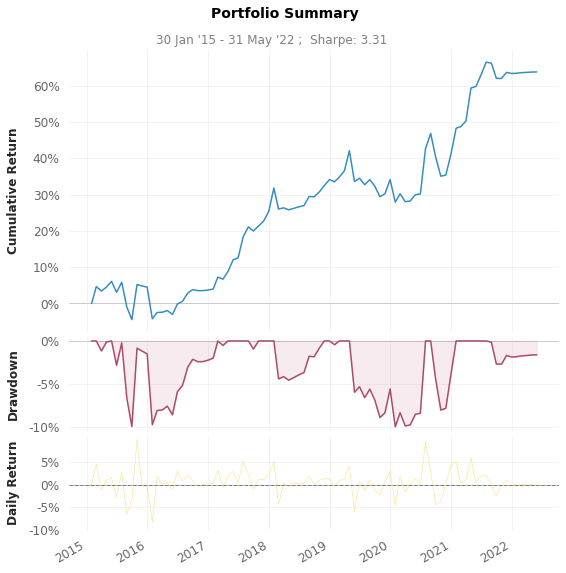

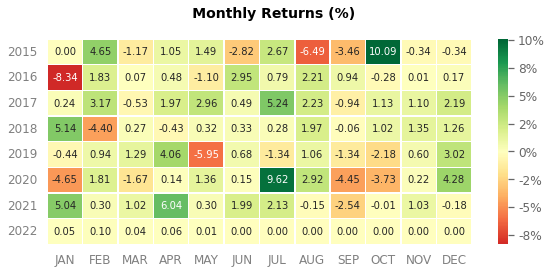

In [56]:
# 결과 확인 
qs.reports.basic(df_RCU['PROFIT']/100)

# 끄읏~